In [185]:
# Import các thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline

df = pd.read_csv("annonimized.csv")  # ví dụ: "data.csv"
qt=pd.read_csv("qt-public.csv")
df

,"concat('it001',`assignment_id`)","concat('it001',`problem_id`)","concat('it001', username)",is_final,status,pre_score,coefficient,"concat('it001',`language_id`)",created_at,updated_at,judgement
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
...,...,...,...,...,...,...,...,...,...,...,...
295193,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,388516cbf597351226be1bdbe5ef30b9dcef570f,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,01-15 16:03:43,01-15 16:03:53,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":..."
295194,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,0,Compilation Error,0,100,it0012,01-15 16:04:07,01-15 16:05:08,"{""times"":[],""mems"":[],""verdicts"":{""\n\nIn func..."
295195,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,01-15 16:04:58,01-15 16:05:08,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":..."
295196,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,8c0f8dd4ff55e1609f733e043ac5e88b1dde6e7c,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,01-15 16:05:13,01-15 16:05:22,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":[0..."


In [186]:
df.rename(columns={
    "concat('it001',`assignment_id`)": 'assignment_id',
    "concat('it001',`problem_id`)": 'problem_id',
    "concat('it001', username)": 'username',
    "concat('it001',`language_id`)":'language_id'
}, inplace=True)
qt.rename(columns={
    "hash": "username",
}, inplace=True)
df

,assignment_id,problem_id,username,is_final,status,pre_score,coefficient,language_id,created_at,updated_at,judgement
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
...,...,...,...,...,...,...,...,...,...,...,...
295193,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,388516cbf597351226be1bdbe5ef30b9dcef570f,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,01-15 16:03:43,01-15 16:03:53,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":..."
295194,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,0,Compilation Error,0,100,it0012,01-15 16:04:07,01-15 16:05:08,"{""times"":[],""mems"":[],""verdicts"":{""\n\nIn func..."
295195,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,01-15 16:04:58,01-15 16:05:08,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":..."
295196,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,8c0f8dd4ff55e1609f733e043ac5e88b1dde6e7c,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,01-15 16:05:13,01-15 16:05:22,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":[0..."


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295198 entries, 0 to 295197
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   assignment_id  295198 non-null  object
 1   problem_id     295198 non-null  object
 2   username       295198 non-null  object
 3   is_final       295198 non-null  int64 
 4   status         295198 non-null  object
 5   pre_score      295198 non-null  int64 
 6   coefficient    295198 non-null  int64 
 7   language_id    295198 non-null  object
 8   created_at     295198 non-null  object
 9   updated_at     295198 non-null  object
 10  judgement      295198 non-null  object
dtypes: int64(3), object(8)
memory usage: 24.8+ MB


In [202]:
import pandas as pd
import json

# Giả sử bạn đã đọc file CSV:
# df = pd.read_csv("submissions.csv")

# Bước 1: Tiền xử lý thời gian
df['created_at'] = pd.to_datetime(df['created_at'], format='%m-%d %H:%M:%S', errors='coerce')
df['updated_at'] = pd.to_datetime(df['updated_at'], format='%m-%d %H:%M:%S', errors='coerce')
df['submit_date'] = df['created_at'].dt.date

# Bước 2: Thời gian hoạt động mỗi lần nộp
df['active_duration'] = (df['updated_at'] - df['created_at']).dt.total_seconds()

# Bước 3: Cờ đánh dấu judgement > 0
def is_judgement_nonzero(j):
    try:
        data = json.loads(j)
        total = sum(sum(v) for v in data.values() if isinstance(v, list))
        return total > 0
    except:
        return False

df['judgement_nonzero'] = df['judgement'].apply(is_judgement_nonzero)

# Bước 4: Tính các đặc trưng

# Tổng số lần nộp
submit_counts = df.groupby("username").size().rename("total_submissions")

# Số problem tham gia
problem_counts = df.groupby("username")["problem_id"].nunique().rename("num_problems")

# Số assignment tham gia
assignment_counts = df.groupby("username")["assignment_id"].nunique().rename("num_assignments")

# Số ngày hoạt động
active_days = df.groupby("username")["submit_date"].nunique().rename("active_days")

# Tính điểm có trọng số cho mỗi lần nộp
df["weighted_score"] = df["pre_score"] * df["coefficient"]
# Tính tổng điểm có trọng số theo username
total_weighted_score = df.groupby("username")["weighted_score"].sum().rename("total_weighted_score")

# Tổng pre_score
total_prescore = df.groupby("username")["pre_score"].sum().rename("total_prescore")

# Số problem với is_final = 1
final_problem = df[df["is_final"] == 1].groupby("username")["problem_id"].nunique().rename("num_final_problems")

# Số problem có pre_score < 10000
low_score_problem = df[df["pre_score"] < 10000].groupby("username")["problem_id"].nunique().rename("num_low_score_problems")

# Tổng số lần nộp có judgement > 0
nonzero_judgement_submissions = df[df["judgement_nonzero"]].groupby("username").size().rename("nonzero_judgement_submissions")
# Tổng thời gian hoạt động mỗi ngày (cho mỗi username và ngày cụ thể)
daily_time = df.groupby(["username", "submit_date"])["active_duration"].sum()

# Sau đó tính trung bình theo từng username
avg_time_per_day = daily_time.groupby("username").mean().rename("avg_time_per_day")


# Bước 5: Gộp tất cả các đặc trưng
features = pd.concat([
    submit_counts,
    problem_counts,
    assignment_counts,
    active_days,
    total_prescore,
    final_problem,
    low_score_problem,
    nonzero_judgement_submissions,
    total_weighted_score,
    avg_time_per_day
], axis=1).fillna(0)

# (Tùy chọn) Xuất ra file CSV
# features.to_csv("user_features.csv")
features = features.reset_index()
features= pd.DataFrame(features)
# In kết quả
features



,username,total_submissions,num_problems,num_assignments,active_days,total_prescore,num_final_problems,num_low_score_problems,nonzero_judgement_submissions,total_weighted_score,avg_time_per_day
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,147,46,7,14,809110,45.0,27.0,16.0,80911000,8.605200e+04
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,259,78,9,20,1421535,78.0,46.0,29.0,142153500,-3.008344e+06
2,01122b3ef7e59b84189e65985305f575d6bdf83c,195,66,7,25,1164882,65.0,29.0,34.0,116488200,-8.035625e+05
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,100,47,4,13,595276,47.0,17.0,7.0,59527600,1.164685e+04
4,013de369c439ab0ead8aa7da64423aa395a8be39,107,52,8,8,692766,52.0,19.0,14.0,68680200,2.461500e+03
...,...,...,...,...,...,...,...,...,...,...,...
1484,feb8a2859a011c59efd22ed419cb69288fe03627,74,34,9,7,413000,34.0,13.0,0.0,41300000,2.060714e+03
1485,fef4a3263ed9a8ab14d457694bb8fd86ccd98312,260,77,6,16,1613185,77.0,39.0,10.0,161318500,1.586587e+05
1486,ff12d6e2ab80696ed8e22fbe5497e96c68d29076,437,100,6,48,2184330,100.0,58.0,49.0,218433000,-1.022273e+06
1487,ff3fa2ec64294f37ae968159f810ebeda7966c51,94,34,7,7,408273,34.0,21.0,8.0,40827300,1.298381e+05


In [203]:
print(type(features))

<class 'pandas.core.frame.DataFrame'>


In [204]:
df_merged1 = pd.merge(features,qt, on="username", how="inner")
df_merged1.loc[:, "diemqt"] = pd.to_numeric(df_merged1["diemqt"], errors="coerce")
df_merged1

,username,total_submissions,num_problems,num_assignments,active_days,total_prescore,num_final_problems,num_low_score_problems,nonzero_judgement_submissions,total_weighted_score,avg_time_per_day,diemqt
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,147,46,7,14,809110,45.0,27.0,16.0,80911000,8.605200e+04,7.5
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,259,78,9,20,1421535,78.0,46.0,29.0,142153500,-3.008344e+06,7.0
2,01122b3ef7e59b84189e65985305f575d6bdf83c,195,66,7,25,1164882,65.0,29.0,34.0,116488200,-8.035625e+05,9.0
3,013de369c439ab0ead8aa7da64423aa395a8be39,107,52,8,8,692766,52.0,19.0,14.0,68680200,2.461500e+03,10.0
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,199,90,9,22,1042765,90.0,45.0,4.0,104276500,-2.287943e+06,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
756,840d07858c03f80f4695056e2cc7d0c474b83a25,111,43,6,15,574052,42.0,23.0,5.0,57405200,1.986640e+05,9.0
757,844f5db2e7e31ae51eba025480679ed7e4708ac6,357,104,17,29,1708325,104.0,64.0,17.0,170832500,-1.435900e+06,8.0
758,845acd04a77b3d1b623f255d9f9f8eae90892dab,155,52,8,10,658331,52.0,21.0,6.0,65833100,7.109127e+05,6.5
759,8460eaaf887a6289fb156f7562fb739ba8e9629e,557,114,12,33,2383183,114.0,85.0,65.0,238318300,-8.072120e+05,10.0


In [205]:
df_merged1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   username                       761 non-null    object 
 1   total_submissions              761 non-null    int64  
 2   num_problems                   761 non-null    int64  
 3   num_assignments                761 non-null    int64  
 4   active_days                    761 non-null    int64  
 5   total_prescore                 761 non-null    int64  
 6   num_final_problems             761 non-null    float64
 7   num_low_score_problems         761 non-null    float64
 8   nonzero_judgement_submissions  761 non-null    float64
 9   total_weighted_score           761 non-null    int64  
 10  avg_time_per_day               761 non-null    float64
 11  diemqt                         754 non-null    object 
dtypes: float64(4), int64(6), object(2)
memory usage: 7

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24712\4041841516.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_diemqt.values, y=corr_with_diemqt.index, palette="coolwarm")


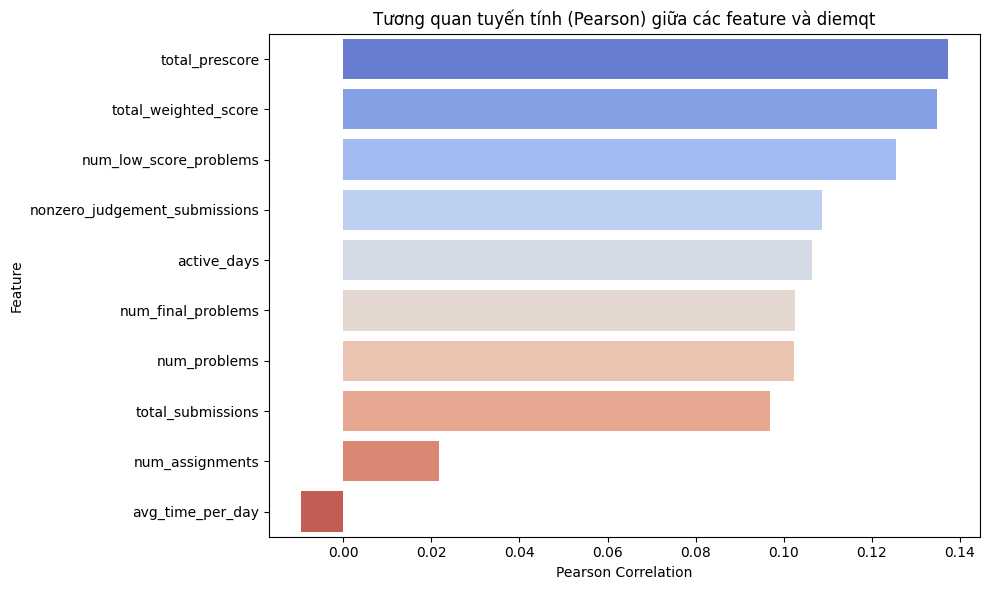

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tính hệ số tương quan giữa các đặc trưng và diemqt
corr_with_diemqt = df_merged1.drop(columns=["username"]).corrwith(df_merged1["diemqt"], numeric_only=True)
corr_with_diemqt = corr_with_diemqt.sort_values(ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_diemqt.values, y=corr_with_diemqt.index, palette="coolwarm")
plt.title("Tương quan tuyến tính (Pearson) giữa các feature và diemqt")
plt.xlabel("Pearson Correlation")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()



biểu đồ trên thể hiện sự tương quan giữa các feature với diemqt 
Nhận thấy rằng các tiêu chí đã lọc nó quan hệ tuyến tính thuận với điểm quá trình (tiến về 1) do nó phản ánh đúng năng lực sinh viên 
Còn avg_time_per_day quan hệ tuyến tính ngược do có một sinh viên nhận bài đã full điểm từ sinh viên khác và nộp liền dẫn đến thòi gian họt động ít
nhưng điểm vẫn cao 

In [212]:
# 1. Xoá các dòng thiếu điểm CK
df_merged2 = df_merged1.dropna(subset=["diemqt"])

# 2. Chia X, y
X = df_merged2.drop(columns=["diemqt", "username",])
y = df_merged2["diemqt"]

# 3. Chia tập train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

# 🔄 4. Scale dữ liệu
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score

# -----------------------------
# 1. Linear Regression
# -----------------------------
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
print("📊 Linear Regression")
print("  MAE:", mean_absolute_error(y_test, y_pred_lr))
print("  R² :", r2_score(y_test, y_pred_lr))
print()

# -----------------------------
# 2. Random Forest
# -----------------------------
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
print("🌲 Random Forest Regressor")
print("  MAE:", mean_absolute_error(y_test, y_pred_rf))
print("  R² :", r2_score(y_test, y_pred_rf))
print()

# -----------------------------
# 3. Support Vector Regressor
# -----------------------------
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)
print("📏 Support Vector Regressor (SVR)")
print("  MAE:", mean_absolute_error(y_test, y_pred_svr))
print("  R² :", r2_score(y_test, y_pred_svr))

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=42),
                       param_grid, cv=5, n_jobs=-1, scoring='r2')

grid_rf.fit(X_train_scaled, y_train)

best_rf = grid_rf.best_estimator_

# Đánh giá lại
y_pred_best_rf = best_rf.predict(X_test_scaled)
print("🌲 Random Forest (Tuned)")
print("  Best Params:", grid_rf.best_params_)
print("  MAE:", mean_absolute_error(y_test, y_pred_best_rf))
print("  R² :", r2_score(y_test, y_pred_best_rf))

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# -----------------------------
# 🌿 Gradient Boosting Regressor
# -----------------------------
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train_scaled, y_train)
# Dự đoán trên tập test
y_pred_gbr = gbr_model.predict(X_test_scaled)
# Đánh giá
print("🌿 Gradient Boosting Regressor")
print("  MAE:", mean_absolute_error(y_test, y_pred_gbr))
print("  R² :", r2_score(y_test, y_pred_gbr))
print()

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# 🌿 Mô hình GBR cơ bản
gbr = GradientBoostingRegressor(random_state=42)
grid_search_gbr = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid_search_gbr.fit(X_train_scaled, y_train)
best_gbr = grid_search_gbr.best_estimator_
y_pred_best_gbr = best_gbr.predict(X_test_scaled)
print("🌿 Gradient Boosting (Tuned)")
print("Best Params:", grid_search_gbr.best_params_)
print("  MAE:", mean_absolute_error(y_test, y_pred_best_gbr))
print("  R² :", r2_score(y_test, y_pred_best_gbr))



📊 Linear Regression
  MAE: 1.196395957873714
  R² : -0.03781726097428706

🌲 Random Forest Regressor
  MAE: 1.1580263157894737
  R² : 0.07583420829805243

📏 Support Vector Regressor (SVR)
  MAE: 1.0066313777158444
  R² : 0.09999139139785584
🌲 Random Forest (Tuned)
  Best Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
  MAE: 1.0892289904232546
  R² : 0.13792633521802056
🌿 Gradient Boosting Regressor
  MAE: 1.0923897750222435
  R² : 0.14861296992875428

Fitting 5 folds for each of 32 candidates, totalling 160 fits
🌿 Gradient Boosting (Tuned)
Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
  MAE: 1.0581568271246666
  R² : 0.1724221631925904


Nhận xét chi tiết:
1. Linear Regression
 R² < 0 → mô hình dự đoán tệ hơn cả trung bình cộng.
→ Tức là các đặc trưng bạn có không phù hợp với mối quan hệ tuyến tính.
Không nên dùng mô hình tuyến tính trong trường hợp này.

2. Random Forest (default)
Cải thiện nhẹ so với Linear, nhưng vẫn còn yếu.
R² chỉ khoảng 7.5%, tức là mô hình chỉ giải thích được 7.5% phương sai của diemqt.
    
 3. SVR (tuy nhiên nó bị overfit với bộ dữ liệu train và ko hoạt động tốt với taapk anominized)
MAE thấp nhất: ~1.01 → mô hình đoán gần với thực tế nhất về trung bình tuyệt đối.
R² cũng cao hơn các mô hình trước → phù hợp nếu bạn ưu tiên sai số nhỏ hơn là giải thích nhiều.

4. Random Forest (Tuned)
Sau khi dò GridSearch, R² cao nhất: 13.8%, tốt hơn rõ rệt so với bản default.
MAE tuy không thấp nhất, nhưng chênh lệch nhỏ, hoàn toàn có thể chấp nhận được.

5. Gradient Boosting Regressor (mặc định) ( tốt hơn vì nó hoạt động với bộ dữ liệu lơn oki hơn svr )
R² ≈ 0.1486 → mô hình giải thích được khoảng 14.86% phương sai của diemqt, nhỉnh hơn cả Random Forest (Tuned) (13.8%).
MAE ≈ 1.0924 → sai số trung bình thấp, gần bằng Random Forest (Tuned) (1.0892).

6. Gradient Boosting Regressor (Tuned)
R² ≈ 0.1724 → giải thích được 17.24% phương sai, cải thiện rõ rệt so với GB mặc định (14.86%) và RF Tuned (13.79%).
MAE ≈ 1.0582 → sai số trung bình thấp nhất trong tất cả mô hình, cho kết quả dự đoán chính xác nhất.
-> model cho điểm cao nhất 

In [217]:
import pandas as pd
import numpy as np

# Chuyển về DataFrame nếu cần
features = pd.DataFrame(features)

# 1. Tách username và đặc trưng
usernames_new = features["username"]
X_new = features.drop(columns=["username"])

# 2. Chuẩn hóa dữ liệu mới
X_new_scaled = scaler.transform(X_new)

# 3. Dự đoán với các mô hình
diemqt_lr = np.round(lr_model.predict(X_new_scaled), 1)
diemqt_rf = np.round(rf_model.predict(X_new_scaled), 1)
diemqt_svr = np.round(svr_model.predict(X_new_scaled), 1)
diemqt_best_rf = np.round(best_rf.predict(X_new_scaled), 1)
diemqt_gbr = np.round(gbr_model.predict(X_new_scaled), 1)
diemqt_best_gbr = np.round(best_gbr.predict(X_new_scaled), 1)

# 4. Tạo và lưu từng DataFrame kết quả

# Linear Regression
df_lr = pd.DataFrame({
    "username": usernames_new,
    "diemqt_du_doan": diemqt_lr
})
df_lr.to_csv("du_doan_LR.csv", index=False)

# Random Forest
df_rf = pd.DataFrame({
    "username": usernames_new,
    "diemqt_du_doan": diemqt_rf
})
df_rf.to_csv("du_doan_RF.csv", index=False)

# SVR
df_svr = pd.DataFrame({
    "username": usernames_new,
    "diemqt_du_doan": diemqt_svr
})
df_svr.to_csv("du_doan_SVR.csv", index=False)

# Best Random Forest
df_rf1 = pd.DataFrame({
    "username": usernames_new,
    "diemqt_du_doan": diemqt_best_rf
})
df_rf1.to_csv("du_doan_RF1.csv", index=False)

# Gradient Boosting (chưa tune)
df_gbr = pd.DataFrame({
    "username": usernames_new,
    "diemqt_du_doan": diemqt_gbr
})
df_gbr.to_csv("du_doan_GBR.csv", index=False)

# Best Gradient Boosting (tuned)
df_gbr1 = pd.DataFrame({
    "username": usernames_new,
    "diemqt_du_doan": diemqt_best_gbr
})
df_gbr1.to_csv("du_doan_GBR1.csv", index=False)

print("✅ Đã lưu dự đoán vào các file CSV:")



✅ Đã lưu dự đoán vào các file CSV:


Kết quả dự đoán điểm quá trình cao do một số nguyên nhân sau 
- do file huấn luyện là thể hiện quá trình thực hành
- Điểm quá trình cò phụ thuộc vào điểm cộng, xung phong làm bài ở giờ học lí thuyết
- Một số giáo viên vẫn chấm điểm quá trình bằng cách điểm danh chứ ít dựa vào kết quả thực hành
- Bộ dữ liệu đầu vào huấn luyện ít hơn nhiều so với bộ dữ liệu dự đoán
- Để bài toán tốt hơn thì cần thêm nhiều dữ liệu và các đặt trưng từ giờ học lí thuyết 